In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# reading the source file 
df = pd.read_csv("smoking.csv")
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


# Data Dictionary 

- ID : index
- gender
- age : 5-years gap
- height(cm)
- weight(kg)
- waist(cm) : Waist circumference length
- eyesight(left)
- eyesight(right)
- hearing(left)
- hearing(right)
- systolic : Blood pressure
- relaxation : Blood pressure
- fasting blood sugar
- Cholesterol : total
- triglyceride
- HDL : cholesterol type
- LDL : cholesterol type
- hemoglobin
- Urine protein
- serum creatinine
- AST : glutamic oxaloacetic transaminase type
- ALT : glutamic oxaloacetic transaminase type
- Gtp : γ-GTP
- oral : Oral Examination status
- dental caries
- tartar : tartar status
- smoking : Target variable 

In [4]:
# size of the dataset
df.shape

(55692, 27)

In [5]:
# checking the types of the variables 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [6]:
# a quick overlook on how the data 
df.describe()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,27845.500000,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,...,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.367288
std,16077.039933,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,...,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.482070
min,0.000000,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,13922.750000,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,27845.500000,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,41768.250000,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,55691.000000,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


In [7]:
# checking for NULL's
df.isnull().sum()

ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

C:\Users\purvi\AppData\Local\Temp\ipykernel_8456\2444330827.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot= True).figure.set_size_inches(25, 12)


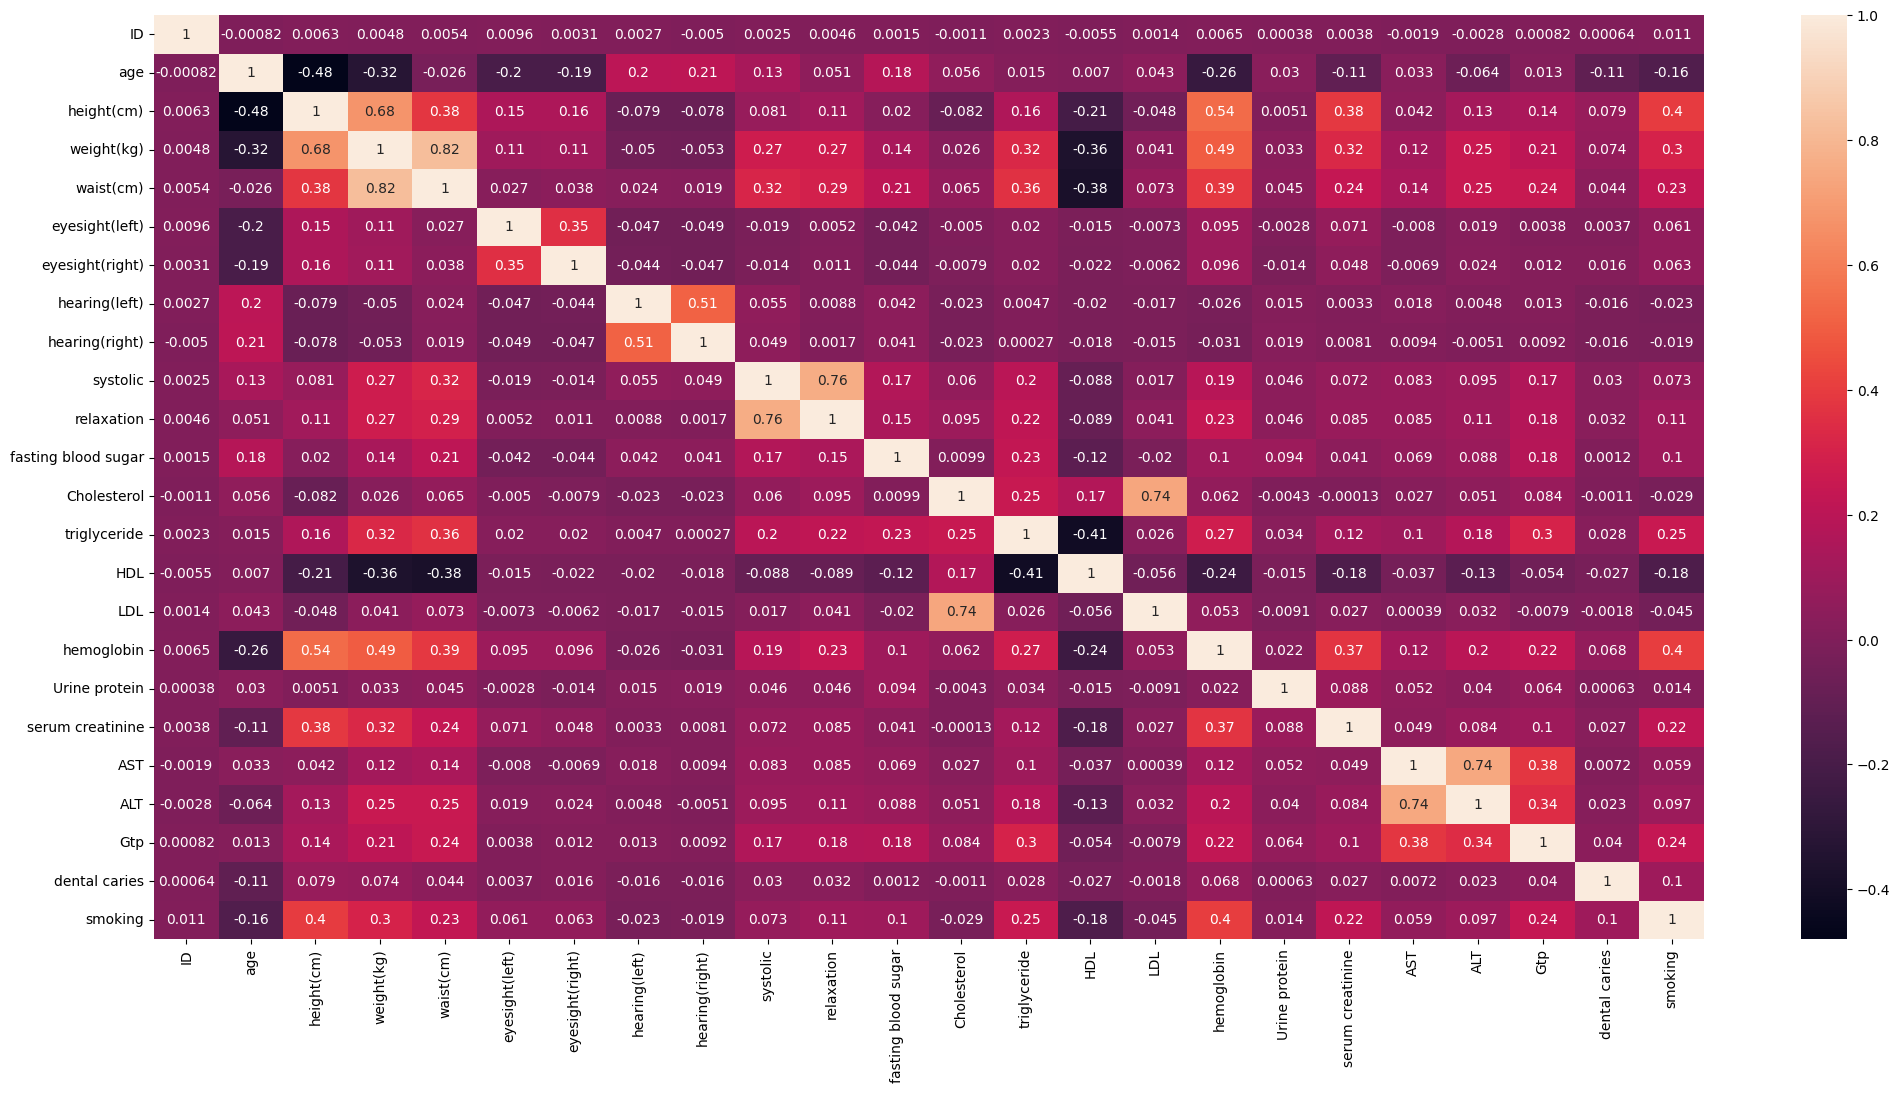

In [8]:
# plotting the correlation to see which variables are strongly correlated 
sns.heatmap(df.corr(), annot= True).figure.set_size_inches(25, 12)

# Initial Data Analysis 

[Text(0.5, 1.0, 'Distribution of the target variable')]

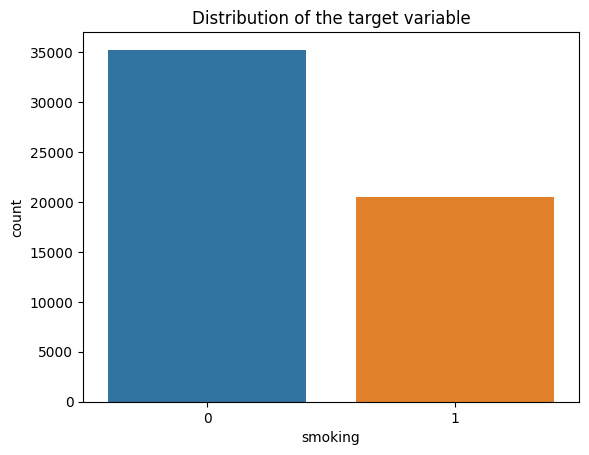

In [9]:
# checking for data imbalance 
sns.countplot(df, x="smoking").set(title="Distribution of the target variable")

In [10]:
df.duplicated().any()

False

In [11]:
df.rename(columns={'serum creatinine': 'serumcreatinine', 'height(cm)': "height",
                    'weight(kg)': 'weight', 'waist(cm)': 'waist', 
                    'eyesight(left)': 'lefteyesight','eyesight(right)': 'righteyesight','Urine protein': 'Urineprotein'}, inplace=True)

In [12]:
df.describe().round(2).T.style.background_gradient(cmap = "coolwarm_r")


,count,mean,std,min,25%,50%,75%,max
ID,55692.000000,27845.500000,16077.040000,0.000000,13922.750000,27845.500000,41768.250000,55691.000000
age,55692.000000,44.180000,12.070000,20.000000,40.000000,40.000000,55.000000,85.000000
height,55692.000000,164.650000,9.190000,130.000000,160.000000,165.000000,170.000000,190.000000
weight,55692.000000,65.860000,12.820000,30.000000,55.000000,65.000000,75.000000,135.000000
waist,55692.000000,82.050000,9.270000,51.000000,76.000000,82.000000,88.000000,129.000000
lefteyesight,55692.000000,1.010000,0.490000,0.100000,0.800000,1.000000,1.200000,9.900000
righteyesight,55692.000000,1.010000,0.490000,0.100000,0.800000,1.000000,1.200000,9.900000
hearing(left),55692.000000,1.030000,0.160000,1.000000,1.000000,1.000000,1.000000,2.000000
hearing(right),55692.000000,1.030000,0.160000,1.000000,1.000000,1.000000,1.000000,2.000000
systolic,55692.000000,121.490000,13.680000,71.000000,112.000000,120.000000,130.000000,240.000000


In [13]:
correlation_mat1 = df.corr().round(2)
#.style.background_gradient(cmap = "magma")
correlation_mat1

C:\Users\purvi\AppData\Local\Temp\ipykernel_8456\1046885527.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_mat1 = df.corr().round(2)


,ID,age,height,weight,waist,lefteyesight,righteyesight,hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urineprotein,serumcreatinine,AST,ALT,Gtp,dental caries,smoking
ID,1.00,-0.00,0.01,0.00,0.01,0.01,0.00,0.00,-0.00,0.00,...,-0.01,0.00,0.01,0.00,0.00,-0.00,-0.00,0.00,0.00,0.01
age,-0.00,1.00,-0.48,-0.32,-0.03,-0.20,-0.19,0.20,0.21,0.13,...,0.01,0.04,-0.26,0.03,-0.11,0.03,-0.06,0.01,-0.11,-0.16
height,0.01,-0.48,1.00,0.68,0.38,0.15,0.16,-0.08,-0.08,0.08,...,-0.21,-0.05,0.54,0.01,0.38,0.04,0.13,0.14,0.08,0.40
weight,0.00,-0.32,0.68,1.00,0.82,0.11,0.11,-0.05,-0.05,0.27,...,-0.36,0.04,0.49,0.03,0.32,0.12,0.25,0.21,0.07,0.30
waist,0.01,-0.03,0.38,0.82,1.00,0.03,0.04,0.02,0.02,0.32,...,-0.38,0.07,0.39,0.05,0.24,0.14,0.25,0.24,0.04,0.23
lefteyesight,0.01,-0.20,0.15,0.11,0.03,1.00,0.35,-0.05,-0.05,-0.02,...,-0.02,-0.01,0.10,-0.00,0.07,-0.01,0.02,0.00,0.00,0.06
righteyesight,0.00,-0.19,0.16,0.11,0.04,0.35,1.00,-0.04,-0.05,-0.01,...,-0.02,-0.01,0.10,-0.01,0.05,-0.01,0.02,0.01,0.02,0.06
hearing(left),0.00,0.20,-0.08,-0.05,0.02,-0.05,-0.04,1.00,0.51,0.06,...,-0.02,-0.02,-0.03,0.01,0.00,0.02,0.00,0.01,-0.02,-0.02
hearing(right),-0.00,0.21,-0.08,-0.05,0.02,-0.05,-0.05,0.51,1.00,0.05,...,-0.02,-0.02,-0.03,0.02,0.01,0.01,-0.01,0.01,-0.02,-0.02
systolic,0.00,0.13,0.08,0.27,0.32,-0.02,-0.01,0.06,0.05,1.00,...,-0.09,0.02,0.19,0.05,0.07,0.08,0.09,0.17,0.03,0.07


In [14]:
corr_pairs1 = correlation_mat1.unstack()
print(corr_pairs1)

ID       ID               1.00
         age             -0.00
         height           0.01
         weight           0.00
         waist            0.01
                          ... 
smoking  AST              0.06
         ALT              0.10
         Gtp              0.24
         dental caries    0.10
         smoking          1.00
Length: 576, dtype: float64


In [15]:
sorted_pairs1 = corr_pairs1.sort_values(kind="quicksort")
print(sorted_pairs1)

height               age                   -0.48
age                  height                -0.48
triglyceride         HDL                   -0.41
HDL                  triglyceride          -0.41
                     waist                 -0.38
                                            ... 
serumcreatinine      serumcreatinine        1.00
AST                  AST                    1.00
ALT                  ALT                    1.00
fasting blood sugar  fasting blood sugar    1.00
smoking              smoking                1.00
Length: 576, dtype: float64


In [16]:
strong_pairs1 = sorted_pairs1[abs(sorted_pairs1) > 0.5]
print(strong_pairs1)

hearing(right)       hearing(left)          0.51
hearing(left)        hearing(right)         0.51
height               hemoglobin             0.54
hemoglobin           height                 0.54
weight               height                 0.68
height               weight                 0.68
AST                  ALT                    0.74
ALT                  AST                    0.74
Cholesterol          LDL                    0.74
LDL                  Cholesterol            0.74
systolic             relaxation             0.76
relaxation           systolic               0.76
weight               waist                  0.82
waist                weight                 0.82
ID                   ID                     1.00
Gtp                  Gtp                    1.00
age                  age                    1.00
height               height                 1.00
weight               weight                 1.00
waist                waist                  1.00
lefteyesight        

C:\Users\purvi\AppData\Local\Temp\ipykernel_8456\3417281974.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="crest").figure.set_size_inches(22, 12)


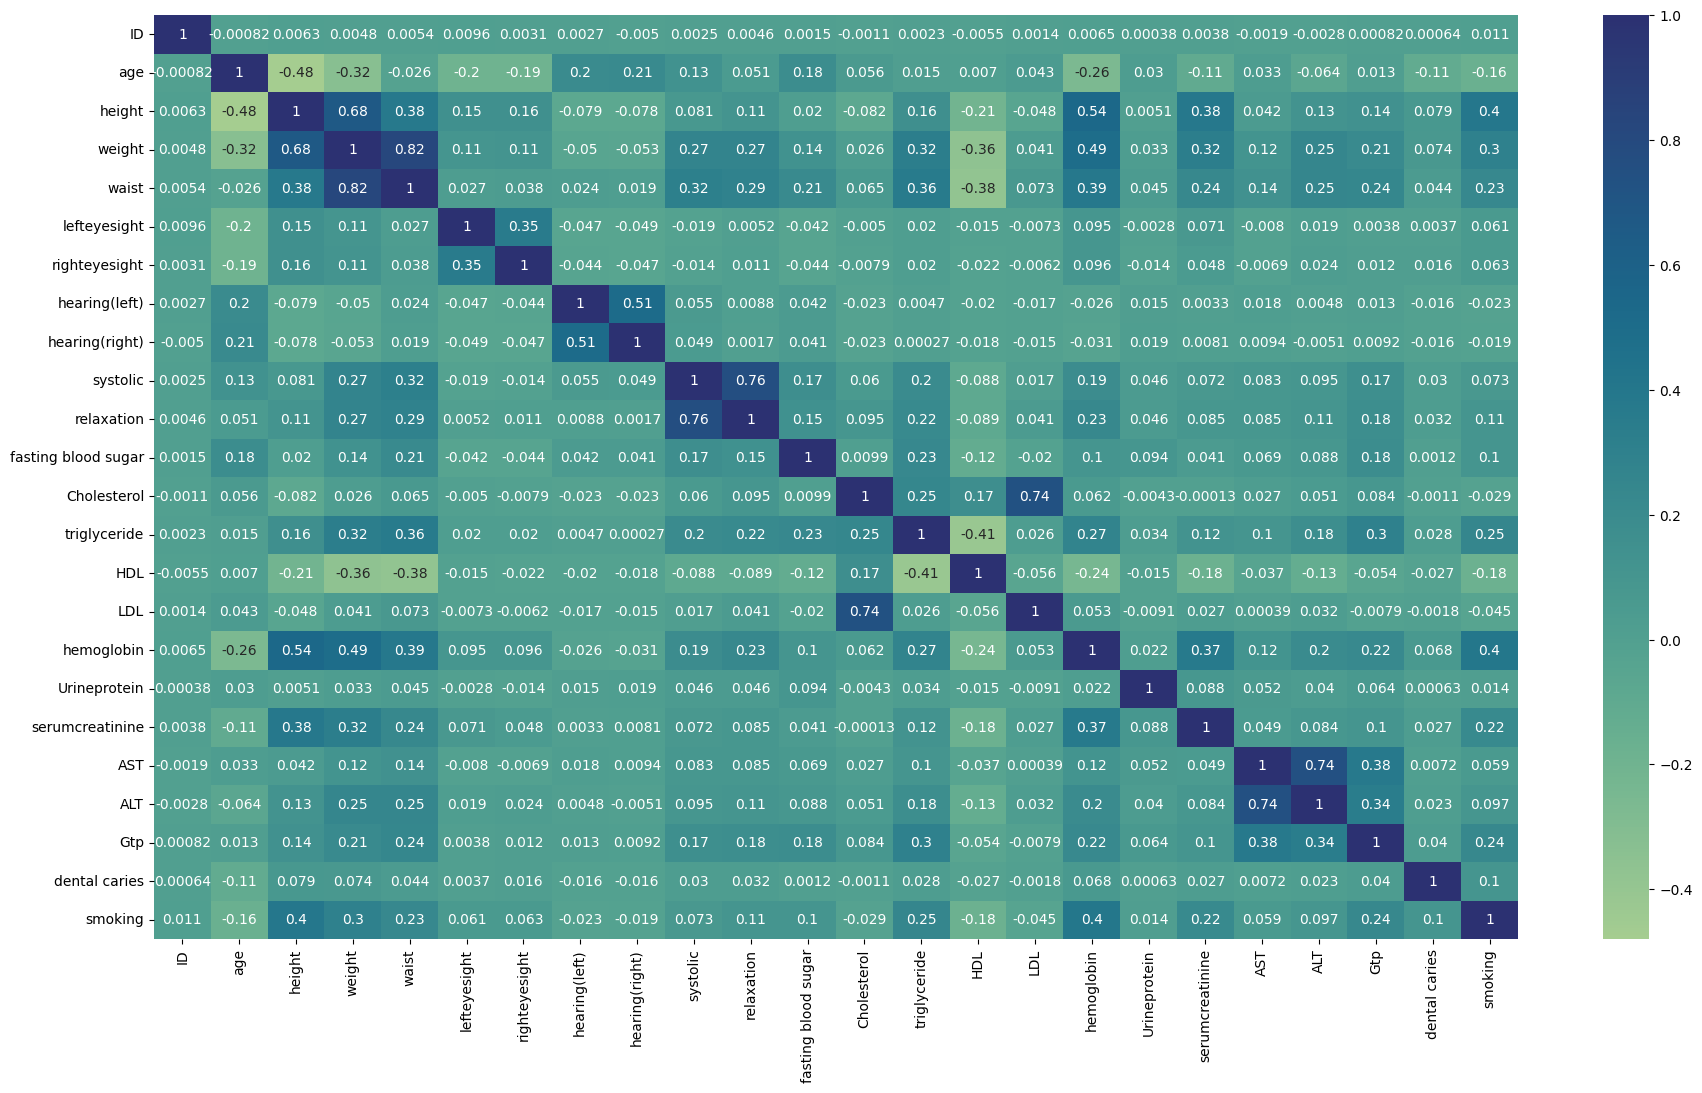

In [43]:
sns.heatmap(df.corr(), annot=True, cmap="crest").figure.set_size_inches(22, 12)
plt.show()

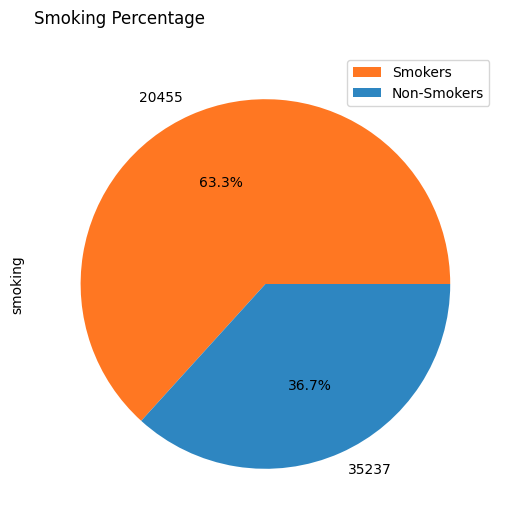

In [18]:
mlabel = [df.smoking.value_counts()[1], df.smoking.value_counts()[0]]
plt.figure(figsize=(8,6))
df.smoking.value_counts().plot(kind='pie', labels=mlabel, autopct='%1.1f%%', colors=['#ff7722', '#2E86C1'])
plt.title('Smoking Percentage\n', loc='left')
plt.legend(['Smokers', 'Non-Smokers'], loc='best')
plt.show()

From the statistical description, it shows that the smokers are of age from 20 years old to 85 years old with min height of 130 cm and max 190 with the mean height of 164 cm and min weight of 30kgs , max 135kgs and mean weight of 65kgs 
Mean of target is 0.37 which means approximately around 15k-20k people who smoke.
There is negative co-relation between age and target; but from the statistics, patients of 35+ age group have shown high signs of smoking.
As per the data here, LDL is negatively co-related to smoking. However smoking can raise your LDL cholesterol levels and lower your HDL cholesterol levels. Over time, this can lead to inflammation in your blood vessels and arteries, and plaque can build up in your arteries.This can narrow your arteries and increase your risk for: heart attack, stroke, peripheral artery disease
The dataset has 6 int64, 3 object and rest are of float64 data types.

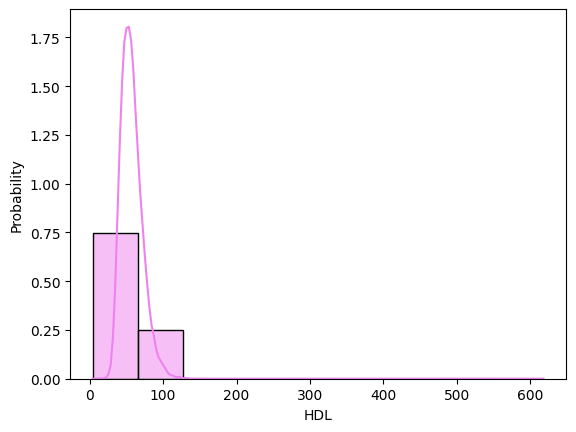

In [19]:
sns.histplot(x=df['HDL'], bins=10, kde=True,
             stat="probability",
             color='violet' );

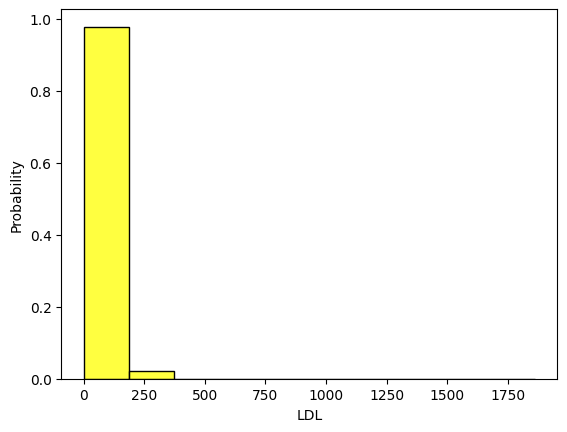

In [20]:
sns.histplot(x=df['LDL'], bins=10, kde=False,
             stat="probability",
             color='yellow' );

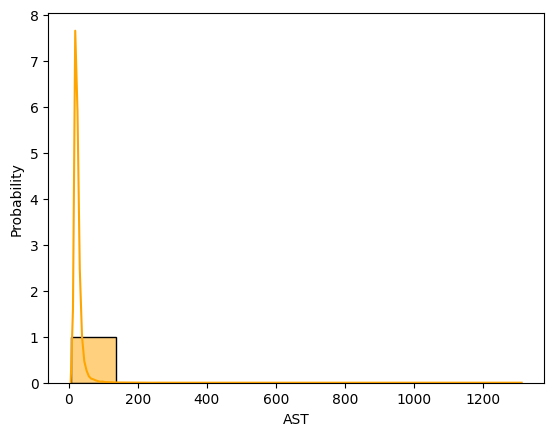

In [21]:
sns.histplot(x=df['AST'], bins=10, kde=True,
             stat="probability",
             color='orange' );

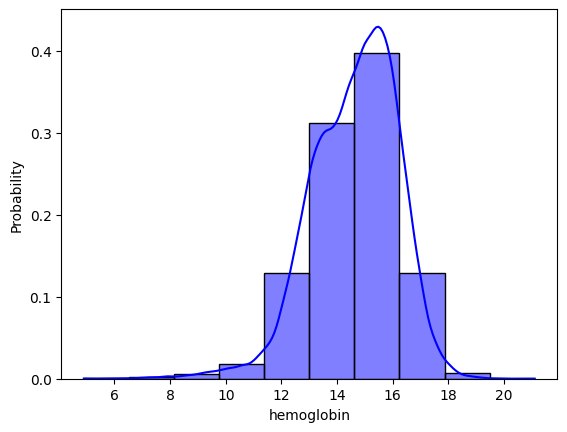

In [22]:
sns.histplot(x=df['hemoglobin'], bins=10, kde=True,
             stat="probability",
             color='blue' );

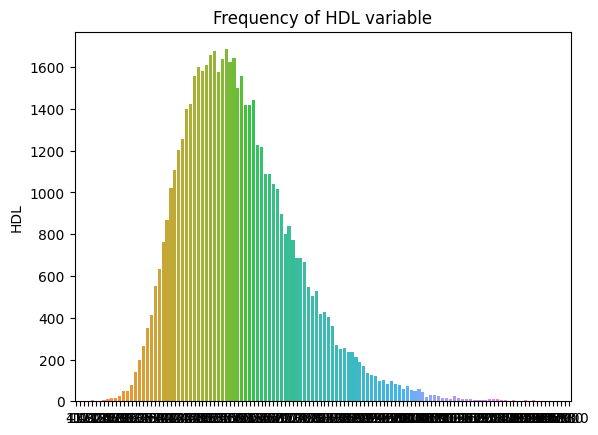

In [23]:
sns.barplot(x = df["HDL"].value_counts().index,
            y = df["HDL"].value_counts(),
            data = df, saturation = 1).set(title = "Frequency of HDL variable");

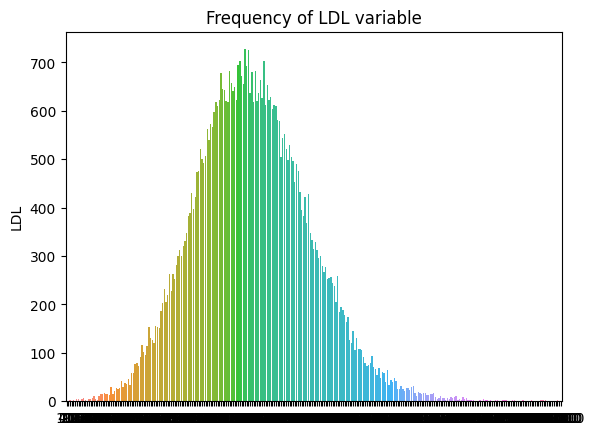

In [24]:
sns.barplot(
            x = df["LDL"].value_counts().index,
            y = df["LDL"].value_counts(),
            data = df, saturation = 1).set(title = "Frequency of LDL variable");

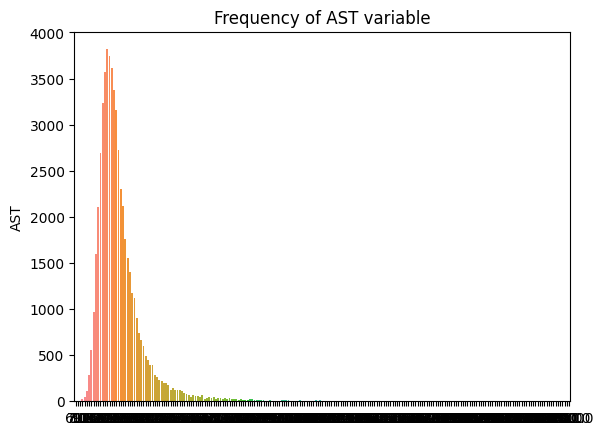

In [25]:
sns.barplot(
            x = df["AST"].value_counts().index,
            y = df["AST"].value_counts(),
            data = df, saturation = 1).set(title = "Frequency of AST variable");

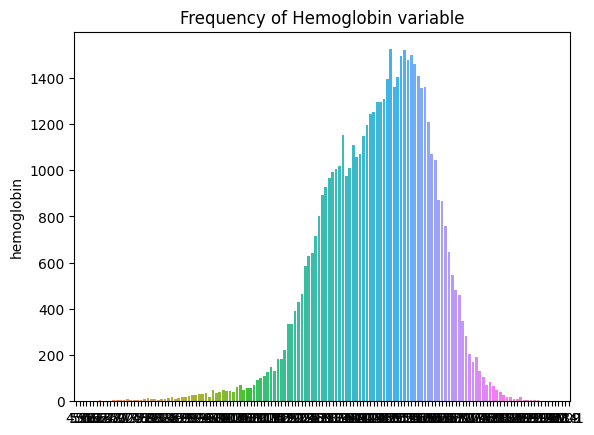

In [26]:
sns.barplot(
            x = df["hemoglobin"].value_counts().index,
            y = df["hemoglobin"].value_counts(),
            data = df, saturation = 1).set(title = "Frequency of Hemoglobin variable");

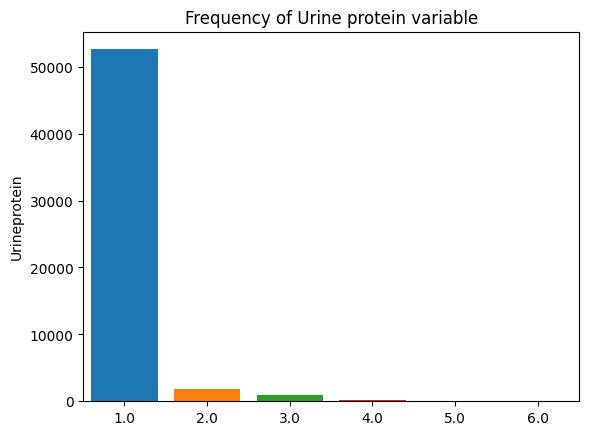

In [27]:
sns.barplot(
            x = df["Urineprotein"].value_counts().index,
            y = df["Urineprotein"].value_counts(),
            data = df, saturation = 1).set(title = "Frequency of Urine protein variable");

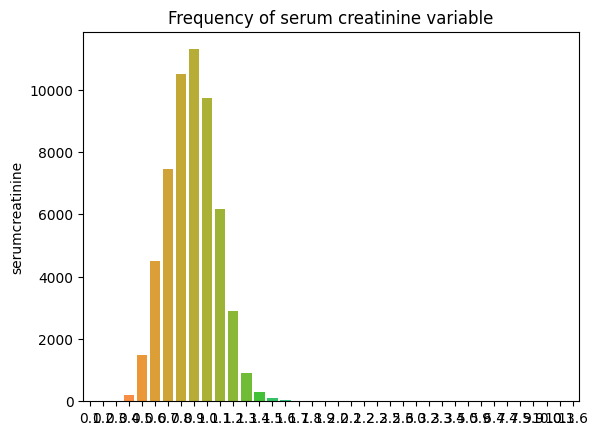

In [28]:
sns.barplot(
            x = df["serumcreatinine"].value_counts().index,
            y = df["serumcreatinine"].value_counts(),
            data = df, saturation = 1).set(title = "Frequency of serum creatinine variable");

Text(0.5, 1.0, 'Countplot of Urineprotein')

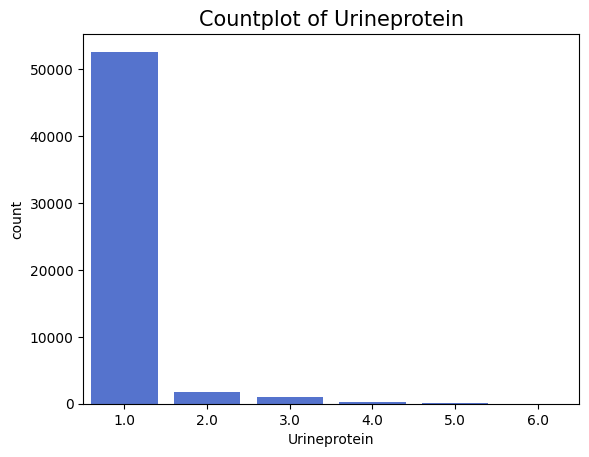

In [29]:
#df.Urineprotein.hist(bins=20, edgecolor='white')
#plt.xlabel('Urine protein')
#plt.title('Fig-3: Urineprotein distribution along the dataset\n', loc='left')
#plt.show();
g1=sns.countplot(data=df, x='Urineprotein', color='royalblue',)
g1.set_title('Countplot of Urineprotein', size=15)

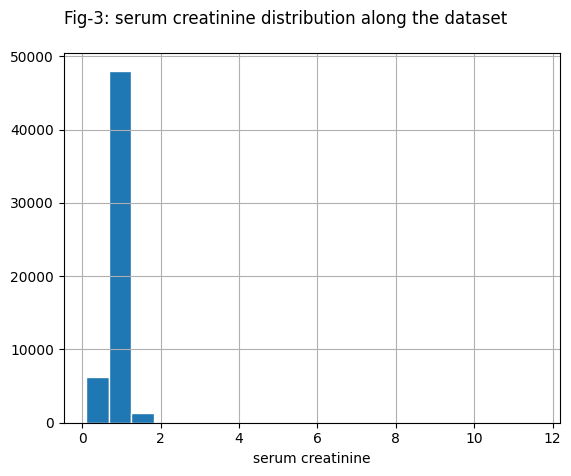

In [30]:
df.serumcreatinine.hist(bins=20, edgecolor='white')
plt.xlabel('serum creatinine')
plt.title('Fig-3: serum creatinine distribution along the dataset\n', loc='left')
plt.show();


In [31]:
x = pd.crosstab(df["gender"], df['smoking'])
x

smoking,0,1
gender,,
F,19432,859
M,15805,19596


In [32]:
y = pd.crosstab(df["age"], df['smoking'])
y

smoking,0,1
age,,
20,787,818
25,1891,1634
30,2120,1936
35,2092,2388
40,9588,5593
45,4670,2367
50,3636,1913
55,3543,1477
60,4440,1727


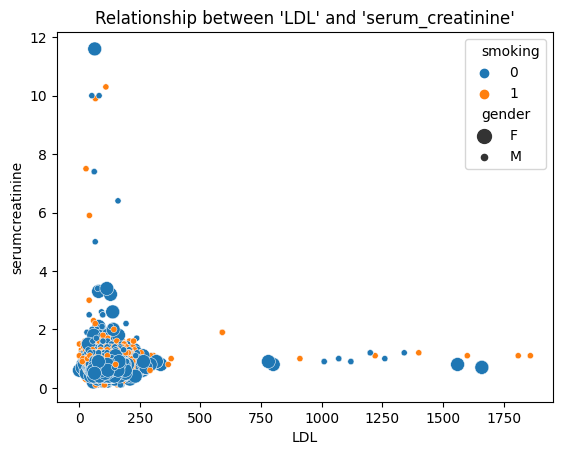

In [33]:
sns.scatterplot(x = "LDL", y = "serumcreatinine", hue = "smoking",
                size = "gender", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between 'LDL' and 'serum_creatinine'");

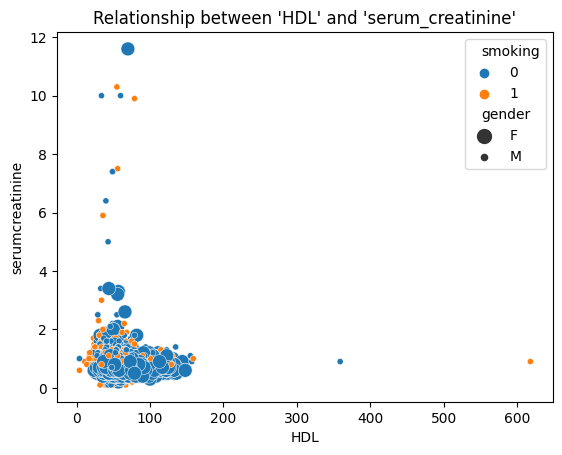

In [34]:
sns.scatterplot(x = "HDL", y = "serumcreatinine", hue = "smoking",
                size = "gender", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between 'HDL' and 'serum_creatinine'");

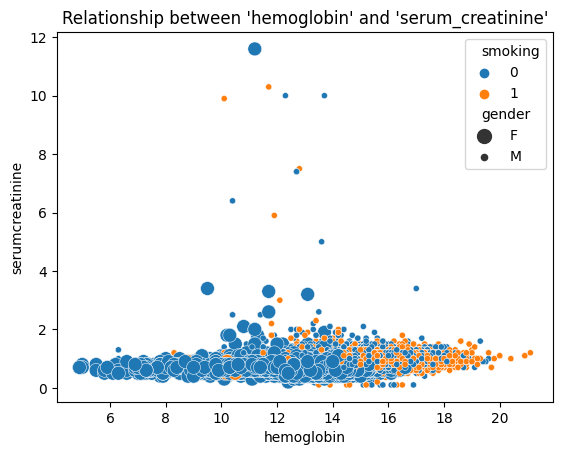

In [35]:
sns.scatterplot(x = "hemoglobin", y = "serumcreatinine", hue = "smoking",
                size = "gender", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between 'hemoglobin' and 'serum_creatinine'");

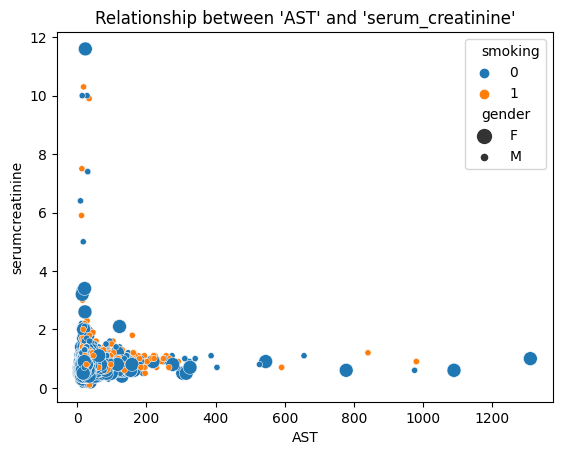

In [36]:
sns.scatterplot(x = "AST", y = "serumcreatinine", hue = "smoking",
                size = "gender", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between 'AST' and 'serum_creatinine'");

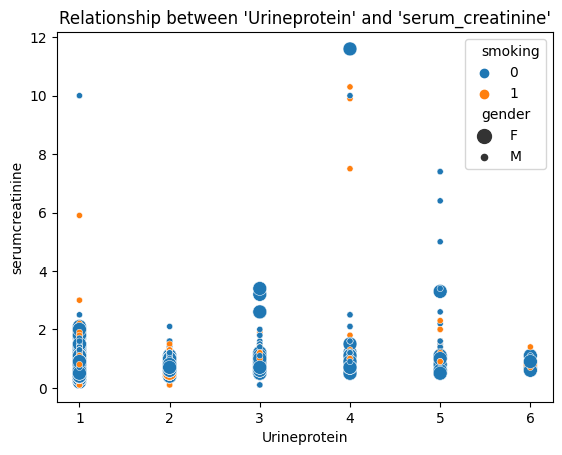

In [37]:
sns.scatterplot(x = "Urineprotein", y = "serumcreatinine", hue = "smoking",
                size = "gender", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between 'Urineprotein' and 'serum_creatinine'");

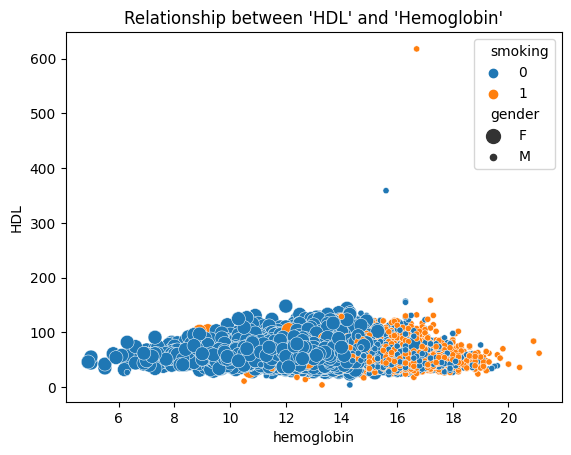

In [38]:
sns.scatterplot(x = "hemoglobin", y = "HDL", hue = "smoking",
                size = "gender", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between 'HDL' and 'Hemoglobin'");

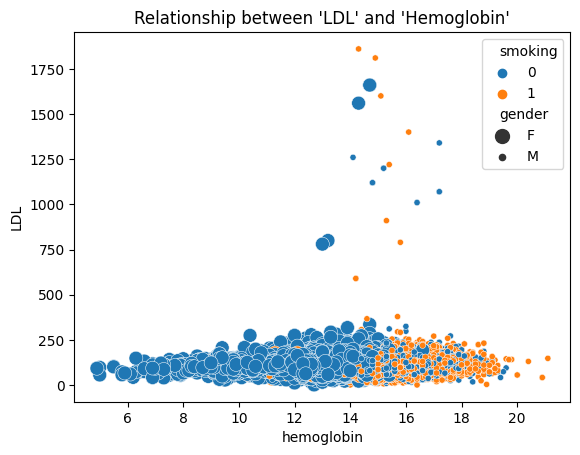

In [39]:
sns.scatterplot(x = "hemoglobin", y = "LDL", hue = "smoking",
                size = "gender", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between 'LDL' and 'Hemoglobin'");

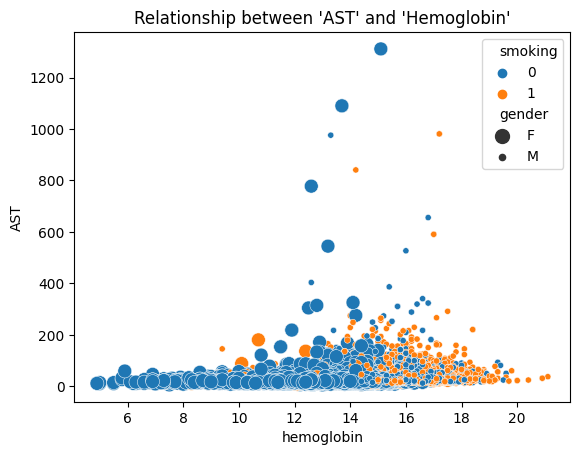

In [40]:
sns.scatterplot(x = "hemoglobin", y = "AST", hue = "smoking",
                size = "gender", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between 'AST' and 'Hemoglobin'");

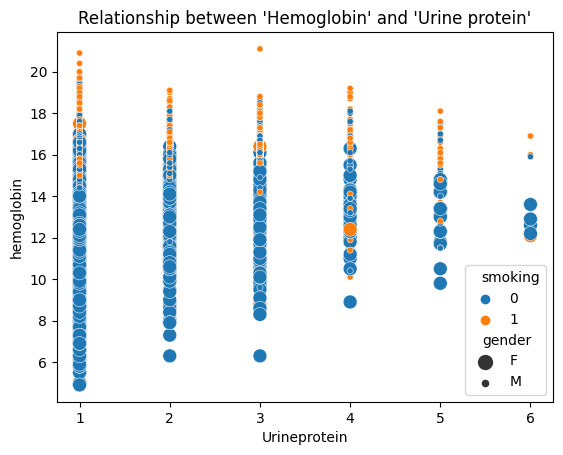

In [41]:
sns.scatterplot(x = "Urineprotein", y = "hemoglobin", hue = "smoking",
                size = "gender", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between 'Hemoglobin' and 'Urine protein'");

C:\Users\purvi\AppData\Local\Temp\ipykernel_8456\4043495029.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  summary=df.groupby(["gender","smoking"])["age","weight","height"].mean().round(0)


<AxesSubplot: xlabel='gender,smoking'>

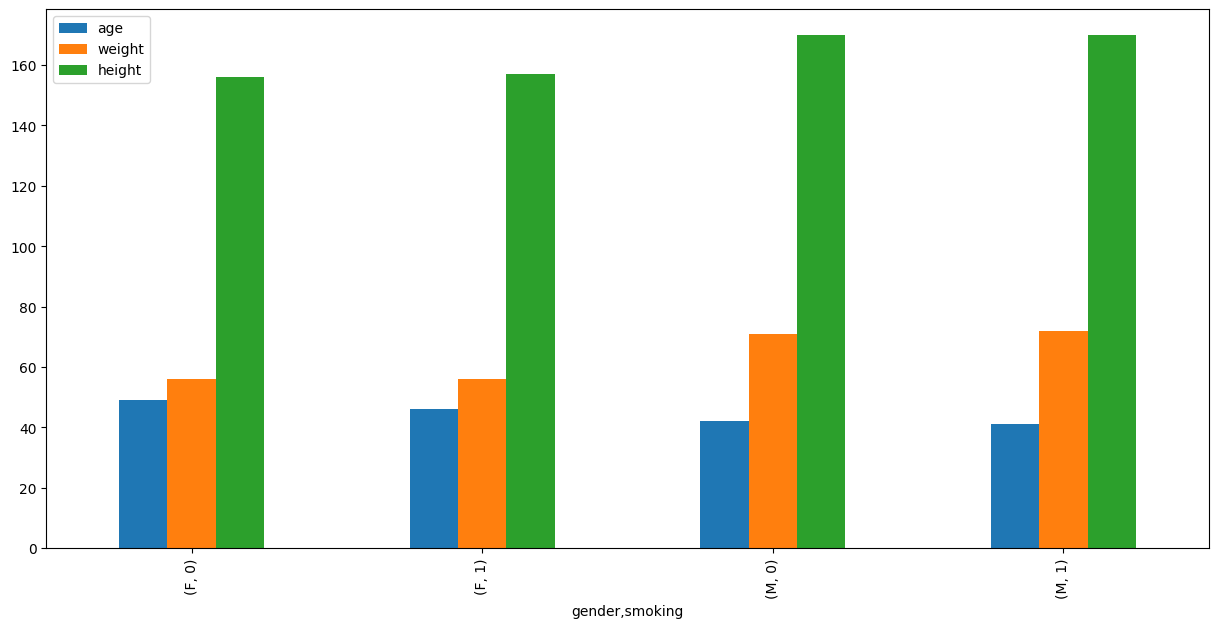

In [42]:
summary=df.groupby(["gender","smoking"])["age","weight","height"].mean().round(0)
summary.plot(kind="bar",figsize=(15,7))